#### VERSION 1.3

*ADS-A topics: Support Vector Machines, Face Recognition, Working with images, Cross validation libraries, Sklearn.metrics*

*Author: Gerard Schouten (2017), Merel Veracx (2018)*

# Face Recognition with Support Vector Machines

In this partly finished notebook, the Support Vector Machine algorithm is used to recognize faces. We will use the Olivetti faces dataset, as included in Scikit-Learn library. More info at: http://scikit-learn.org/stable/datasets/olivetti_faces.html

We start by importing numpy, scikit-learn, and matplotlib, the Python libraries we will be using for this analysis. 

First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement.

In [1]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline 

print('scikit-learn version:', sk.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

scikit-learn version: 0.23.2
numpy version: 1.19.2
matplotlib version: 3.3.2


## 1 - Load Olivetti Face Dataset

Write the code to import the olivetti faces dataset. Load them into the variable faces. Make sure to use the correct library from sklearn.datasets. Check if the dataset has been loaded correctly by inspecting the description.

In [2]:
faces = fetch_olivetti_faces()
print(faces.data)
## check all of the unique target values
print(np.unique(faces.target))

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


## 2 - Investigate the Olivetti Face Dataset

As you can see by running the following statement, the result of fetch_olivetti_faces(), as stored in the variable `faces`, is a dictionary with the following keys: `faces.target`, `faces.images`, `DESCR`, `data`.

In [3]:
print(faces.keys())

print("Target: ", faces.target.shape)
print(faces.target)
print("Images: ", faces.images.shape)
print("Data: ", faces.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
Target:  (400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 3

#### They are 400 images in the dataset. The size of an image is 64 x 64. They are 40 different subjects (people). How do I know? I explored the daatset, I looked into DESCR and it states that they are 40 subjects. 10 images for 40 people makes up to 400 images. the target number is from 0 to 39. thats 40 people

In [4]:
print("Description: ", faces.DESCR)

Description:  .. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================

#### You can tell when values are scaled if they are between 0 to 1.
#### When we call faces.images you'll see that the values are scaled, for example: 0.30991736, 0.3677686. 
#### So, in this case the values are already scaled and we don't have to do any scaling. 

In [5]:
faces.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

#### Plot the first 20 images

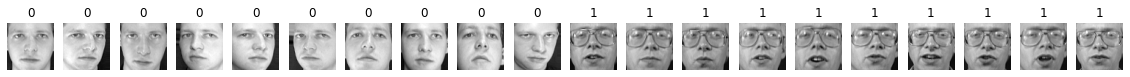

In [6]:
rows = 1
cols = 20
n_faces = 20
fig = plt.figure(figsize=(20, 20))
for i in range(n_faces):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(faces.target[i])

#### Plot all images

In [7]:
# Method to plot images
def print_faces(images, target, numberOfImages):
    rows = 20
    cols = 20
    fig = plt.figure(figsize=(20,20))
    for i in range(numberOfImages):
        fig.add_subplot(rows, cols, i + 1)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.axis('off')
        plt.title(target[i])

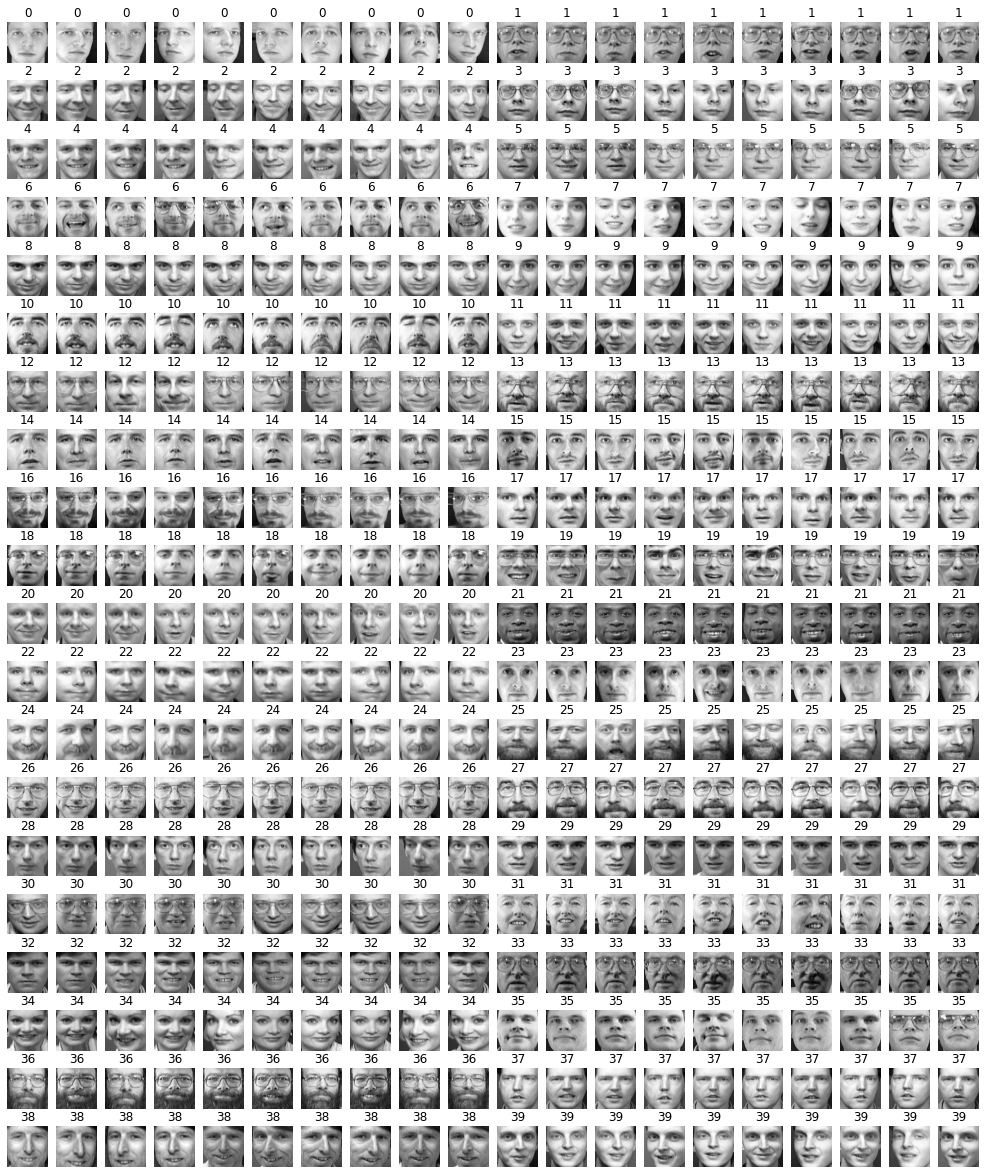

In [8]:
print_faces(faces.images, faces.target, len(faces.images))

As you can see now we have confirmed that there are 40 individuals with 10 different images each in the dataset.

## 3 - Analysis with SVM

We will build a classifier whose model is a hyperplane that separates instances of one class from the rest. Support Vector Machines (SVM) are supervised learning methods that try to obtain these hyperplanes in an optimal way, by selecting the ones that pass through the widest possible gaps between instances of different classes. New instances will be classified as belonging to a certain category based on which side of the surfaces they fall on. 

* classes: the 40 individuals
* features: the grey value of 20 x 20 pixels, so there are 400 features for each datapoint
* training data: several pictures of each of the 40 individuals
* test data: minimally one picture of each of the 40 individuals

In [9]:
svc_1 = SVC(kernel='linear')

#### By human intuition, we can say that the algorithm will have difficulty with faces that has funny face expressions, or images with the same label has faces with and without glasses. (Check the image plot above)
#### If we look our plot, we can choose images with label 19, number 5 and 6 images or images with label 37, number 9 and 10.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 4096)
(280,)
(120, 4096)
(120,)


In [11]:
svc_1.fit(X_train, y_train)
y_pred = svc_1.predict(X_test)
print("Accuracy in percentage:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy in percentage: 95.83333333333334


In [12]:
print(classification_report(y_test, y_pred,  labels=np.unique(faces.target)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         0
          17       0.75    

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Implement GridSearchCV to find the best params and kernel.

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
gridSC = GridSearchCV(SVC(),param_grid)
gridSC.fit(X_train,y_train)
print(gridSC.best_params_)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}


#### Using GridSearchCV we found the best parameters for our algorithm. Instead of using linear for our kernel, we're going to use RBF, because it's the best performing kernel for our algorithm.

In [14]:
grid_predictions = gridSC.predict(X_test)
print("Accuracy in percentage:", metrics.accuracy_score(y_test, grid_predictions)*100)
print(classification_report(y_test, grid_predictions,  labels=np.unique(faces.target)))

Accuracy in percentage: 96.66666666666667
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.00      0.00      

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Above you can see that using RBF we have a higher accuracy of about 96.66% than Linear which has an accuracy of 95.83%

#### For most of the images it performs very well, there are some that did not perform well. For example, you can see that images 16, 17, 29, 34 and 39 did not perform that well. 

#### Image 16 has no results. I dont know why, but i think it the image data is corrupted, or the image has a face with glasses on.

#### Cross-validation

Show what all the accuracy scores are and compute the average value.

In [15]:
import matplotlib.pyplot as plt

k_fold = KFold(n_splits = 5, random_state = 0)
cv_result = cross_val_score(svc_1 , X_test, y_test, scoring='accuracy', cv = k_fold)
print('Cross Validation result:', cv_result)
## get the average
print('The average is:', np.mean(cv_result))

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Cross Validation result: [0.66666667 0.625      0.70833333 0.5        0.625     ]
The average is: 0.625


##### The worst run was wrongly missclassified with 0.5, 50%.
##### The average is aprox. 63% 

#### StratifiedKFold

The function ``StratifiedKFold`` is a variation of k-fold which returns stratified folds: Each set contains approximately the same percentage of samples of each target class as the complete set.

The example below illustates this. There are 2 classes, and the StratifiedKFold creates 3 train and test sets, each containing the indexes of the elements selected.

In [16]:
from sklearn.model_selection import StratifiedKFold

labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(3)

for train, test in skf.split(labels, labels):
     print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


#### Applied StratifiedKFold on the Facial Recognition with SVM

In [17]:
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for train, test in skf.split(faces.data, faces.target):
    X_train, X_test = faces.data[train], faces.data[test]
    y_train, y_test = faces.target[train], faces.target[test]
    
    svc_stratkfold = SVC(kernel='linear')
    svc_stratkfold.fit(X_train, y_train)
    y_pred = svc_stratkfold.predict(X_test)
    print("Accuracy in percentage:", metrics.accuracy_score(y_test, y_pred)*100)
    
    print("TRAIN:", train)
    print("TEST:", test, '\n' '\n')

Accuracy in percentage: 92.53731343283582
TRAIN: [  4   5   6   7   8   9  13  14  15  16  17  18  19  23  24  25  26  27
  28  29  34  35  36  37  38  39  43  44  45  46  47  48  49  53  54  55
  56  57  58  59  64  65  66  67  68  69  73  74  75  76  77  78  79  83
  84  85  86  87  88  89  94  95  96  97  98  99 103 104 105 106 107 108
 109 113 114 115 116 117 118 119 124 125 126 127 128 129 133 134 135 136
 137 138 139 143 144 145 146 147 148 149 154 155 156 157 158 159 163 164
 165 166 167 168 169 173 174 175 176 177 178 179 184 185 186 187 188 189
 193 194 195 196 197 198 199 203 204 205 206 207 208 209 214 215 216 217
 218 219 223 224 225 226 227 228 229 233 234 235 236 237 238 239 244 245
 246 247 248 249 253 254 255 256 257 258 259 263 264 265 266 267 268 269
 274 275 276 277 278 279 283 284 285 286 287 288 289 293 294 295 296 297
 298 299 304 305 306 307 308 309 313 314 315 316 317 318 319 323 324 325
 326 327 328 329 334 335 336 337 338 339 343 344 345 346 347 348 349 353
 3

#### LeaveOneOut
The function ``LeaveOneOut`` (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set.

In [18]:
from sklearn.model_selection import LeaveOneOut

Potential users of LOO for model selection should weigh a few known caveats. When compared with k-fold cross validation, one builds n models from n samples instead of k models. Moreover, LOO is trained on n-1 samples rather than (k-1)/k * n. Hence LOO is computationally more expensive than k-fold cross validation.


In terms of accuracy, LOO often results in high variance as an estimator for the test error. Intuitively, since n-1 of the n samples are used to build each model, models constructed from folds are virtually identical to each other and to the model built from the entire training set.
However, if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.

As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO.

#### Apply LeaveOnOut on the Facial Recognition with SVM

In [19]:
loo = LeaveOneOut()
svc_loo = SVC(kernel='linear')
svc_loo.fit(X_train, y_train)
y_pred = svc_loo.predict(X_test)
cvloo_result = cross_val_score(svc_loo , X_test, y_test, scoring='accuracy', cv = loo, n_jobs=-1)
print('Cross Validation result:', cvloo_result)
# You use a % as a placeholder, which is replaced by np.mean and np.std in this case. 
# The f then refers to "Floating point decimal format". 
# The .3 indicates to round to 3 places after the decimal point.
print('Accuracy: %.3f, STD: %.3f' % (np.mean(cvloo_result), np.std(cvloo_result)))

Cross Validation result: [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
Accuracy: 0.759, STD: 0.427


We import the sklearn ``metrics`` package and determine also precision and recall for the test set, for _each class_. 

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [21]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9398496240601504
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         3
           2       1.00      0.25      0.40         4
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         4
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      0.67     

#### Conclusion: The SVM classifier proves to have a high accuracy for face recognition. With accuracy of 100% on the training set and 96% on the test set.

## 5 - Discriminate People with or without Glasses

Now, another problem. 

Try to classify images of people with and without glasses. A few tips to take into account.
- Use the indexes below to relabel all the images
- Create a training & test set for this new problem
- Again try a [linear SVC classifier](http://en.wikipedia.org/wiki/Kernel_%28linear_algebra%29) (start by using the default parameters)
- Do the analysis and evaluate.
- And  show a classification report as above.
- Which images go wrong?

In [22]:
# Index ranges of images of people with glasses
glasses = [
(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
(330, 339), (358, 359), (360, 369)
]

Use that target to create a train and test set.

In [23]:
from sklearn.preprocessing import OneHotEncoder

# glasses is a list of tuple
# i need two classes, with and without glasses
# set without glasses as 0 and with glasses as 1
# create numpy array of zeroes based on length target column
# iterate glasses list
# modify the numpy array at the start and end of the glasses tuple,
# add plus 1, because the tuple starts at 0 and not 1... so it goes like 10,19 instead of 11 20
# then change the 0 to 1 

#numpy array of zeres
newTarget = np.zeros(len(faces.target))
for i, j in glasses:
    # boolean indexing
    newTarget[i : j + 1] = 1

faces.new_target = newTarget
faces.new_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
faces.new_target.shape

(400,)

#### DIY Train your SVM and validate

Which test pictures are misclassified?

In [25]:
svc_2 = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.new_target, test_size=0.3, random_state=42)
svc_2.fit(X_train, y_train)
y_pred = svc_2.predict(X_test)

# print("Accuracy in percentage:", metrics.accuracy_score(y_test, y_pred)*100)
# print(classification_report(y_test, y_pred,  labels=np.unique(faces.new_target_le)))
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

# using ravel function to flatten array
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)


# misclassification rate = FP + FN / TP + TN + FP + FN * 100 is about 4%

Accuracy on training set:
1.0
Accuracy on testing set:
0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97        90
         1.0       0.85      0.97      0.91        30

    accuracy                           0.95       120
   macro avg       0.92      0.96      0.94       120
weighted avg       0.95      0.95      0.95       120

Confusion Matrix:
[[85  5]
 [ 1 29]]
85 5 1 29


#### There's a misclassification rate of about 4%

Now, let's train with only 10 images: all from the same person, sometimes with glasses and sometimes without glasses. With this we'll try to discard that it's remembering faces, instead of features related with glasses. We'll separate the subject with indexes from 30 to 39. We'll train and evaluate in the rest of the 390 instances. After that, we'll evaluate again over the separated 10 instances.


In [26]:
print(faces.new_target.shape)

# slice array to get the indexes from 30 to 39
tenTarget = faces.new_target[30:40]
print(tenTarget.shape)
tenData = faces.data[30:40]
print(tenData.shape)
tenImages = faces.images[30:40]
print(tenImages.shape)

# after playing with numpy arrays, i couldnt find a way. 
# So i tried to do this with the same approach i did to get the ten images.
# create a new array 
# exclude the ten images
# assign the rest of images to variables to be used
# get the shape to know if i got it correct

excludeTen = np.ones(len(faces.new_target))
excludeTen[30:40] = 0

restTarget = faces.new_target[excludeTen == 1]
print(restTarget.shape)
restData = faces.data[excludeTen == 1]
print(restData.shape)
restImages = faces.images[excludeTen == 1]
# restImages =  faces.images[0:390]
print(restImages.shape)

(400,)
(10,)
(10, 4096)
(10, 64, 64)
(390,)
(390, 4096)
(390, 64, 64)


#### Train and evaluate the 390 images

In [27]:
svc_3 = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(restData, restTarget, test_size=0.3, random_state=42)
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9572649572649573
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        87
         1.0       0.86      1.00      0.92        30

    accuracy                           0.96       117
   macro avg       0.93      0.97      0.95       117
weighted avg       0.96      0.96      0.96       117

Confusion Matrix:
[[82  5]
 [ 0 30]]


Show the evaluation faces, and their predicted category.

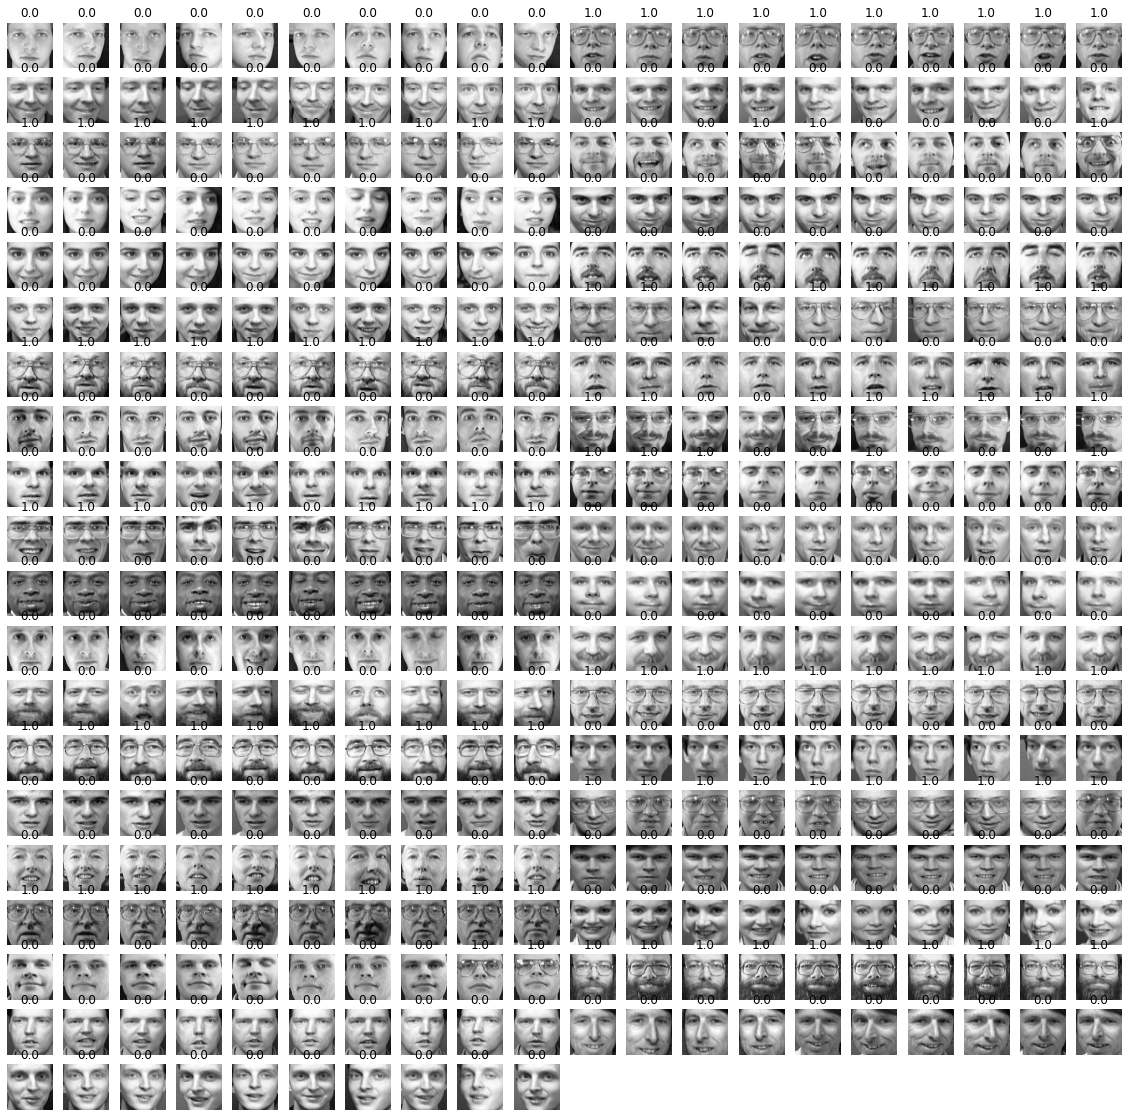

In [28]:
rows = 20
cols = 20
fig = plt.figure(figsize=(20, 20))
for i in range(len(restData)):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(restImages[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(restTarget[i])

#### Train and evaluate the 10 images

In [29]:
svc_4 = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(tenData, tenTarget, test_size=0.3, random_state=42)
train_and_evaluate(svc_4, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion Matrix:
[[1 0]
 [2 0]]


C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Show the evaluation faces, and their predicted category. Face number eight is incorrectly classified as no-glasses (probably because his eyes are closed!).

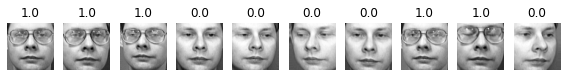

In [30]:
rows = 1
cols = 20
fig = plt.figure(figsize=(20, 20))
for i in range(len(tenData)):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(tenImages[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(tenTarget[i])